In [1]:
import os
import math
import keras
import tensorflow as tf
from keras_retinanet.models import load_model
from keras_retinanet.preprocessing.csv_generator import CSVGenerator
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
import cv2
import time
import numpy as np
from shared import get_session
import matplotlib.pyplot as plt

BASE_DIR = os.getcwd()
DATASET_DIR = os.path.join(BASE_DIR, 'datasets', 'GTSDB', 'FullIJCNN2013')
MODEL_PATH = os.path.join(BASE_DIR, 'snapshots', 'custom_resnet50_10_test.h5')
TEST_GROUND_TRUTH = os.path.join(DATASET_DIR, "gt_test.csv")
CLASS_MAPPINGS = os.path.join(DATASET_DIR, "cm.csv")

keras.backend.tensorflow_backend.set_session(get_session())
model = load_model(MODEL_PATH)

/home/madspoderpetersen/deep-traffic/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/madspoderpetersen/deep-traffic/venv/lib/python3.5/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
'''
class test(CSVGenerator):
    def __init__(self, 
        csv_data_file,
        csv_class_file,
        base_dir=None,
        **kwargs
        ):
        super().__init__(csv_data_file,
        csv_class_file,
        base_dir=None,
        **kwargs)
        
    def get_images(self):
        return self.image_names
    

batch_size = 1
test_generator = test(
    TEST_GROUND_TRUTH,
    CLASS_MAPPINGS,
    batch_size=1,
)

files = []
with open(TEST_GROUND_TRUTH) as fp:
    for line in fp:
        files.append(line.split(',')[0])

print(test_generator.get_images())
print(len(files))
print(test_generator.size())
print(test_generator.num_classes())
        
#boxes, scores, labels = model.predict_generator(
#    test_generator, 
#    verbose=1, 
#    steps=math.ceil(test_generator.size()/batch_size)
#)
print(list(zip(boxes[0], scores[0], labels[0])))

'''



files = []
with open(TEST_GROUND_TRUTH) as fp:
    for line in fp:
        files.append(line.split(',')[0])
        
for imagename in files:
    image = read_image_bgr(os.path.join(DATASET_DIR, imagename))
    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)
    
    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    
    print(list(zip(boxes[0], scores[0], labels[0])))
    
    #print("processing time: ", time.time() - start)

    # correct for image scale
    #boxes /= scale

    # visualize detections
    #for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        # if score < 0.93:
            #break
        
        #color = label_color(label)
        
        #b = box.astype(int)
        #draw_box(draw, b, color=color)
        
        #caption = "{} {:.3f}".format(label, score)
        #draw_caption(draw, b, caption)
        
        #print("Score for image {}: {}, class: {}".format(imagename, score, label))
        
        #plt.figure(figsize=(15, 15))
        #plt.axis('off')
        #plt.imshow(draw)
        #plt.show()


In [2]:
# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import os
import math
import keras
import tensorflow as tf
from keras_retinanet.models import load_model
from keras_retinanet.preprocessing.csv_generator import CSVGenerator
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
import cv2
import time
import numpy as np
from shared import get_session
import matplotlib.pyplot as plt

BASE_DIR = os.getcwd()

model_path = os.path.join(BASE_DIR, 'snapshots', 'custom_resnet50_lolle_resume_25.h5')
#model_path = os.path.join(BASE_DIR, 'snapshots', 'custom_resnet50_09.h5')


# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50', convert=True)


/home/madspoderpetersen/deep-traffic/venv/lib/python3.5/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [30]:
!keras-retinanet/keras_retinanet/bin/convert_model.py /snapshots/custom_resnet50_lolle_resume_25.h5 /snapshots/custom_resnet50_lolle_resume_25_test.h5


Traceback (most recent call last):
  File "keras-retinanet/keras_retinanet/bin/convert_model.py", line 58, in <module>
    main()
  File "keras-retinanet/keras_retinanet/bin/convert_model.py", line 51, in main
    model = models.load_model(args.model_in, convert=True, backbone_name=args.backbone, nms=args.nms)
  File "keras-retinanet/keras_retinanet/bin/../../keras_retinanet/models/__init__.py", line 74, in load_model
    import keras.models
ImportError: No module named keras.models


In [28]:
!ls keras-retinanet/keras_retinanet/bin


convert_model.py  evaluate_coco.py  __init__.py
debug.py	  evaluate.py	    train.py


processing time:  0.09316825866699219
14


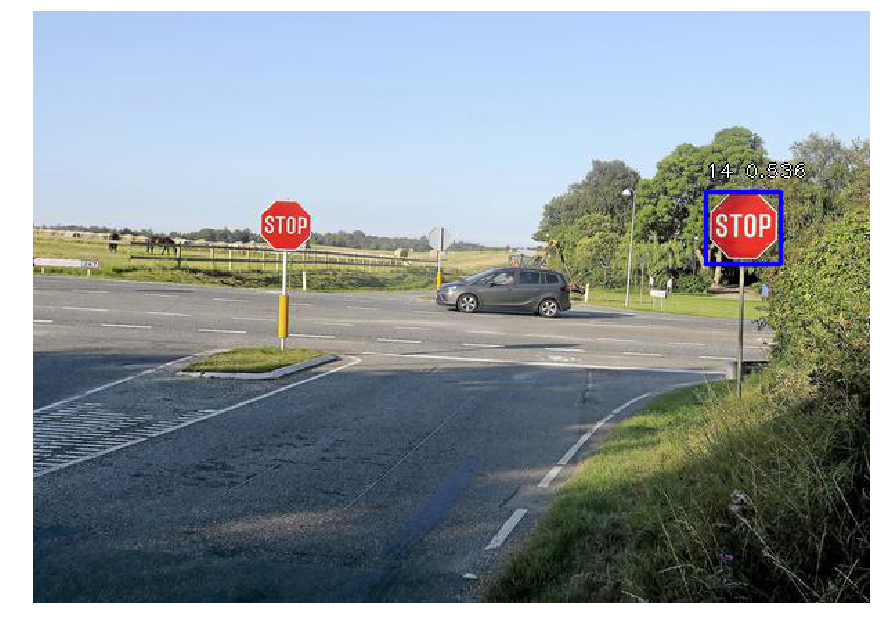

In [22]:


image = read_image_bgr('stop2.jpg')


#image = read_image_bgr('datasets/GTSDB/FullIJCNN2013/00028.ppm')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(label, score)
    draw_caption(draw, b, caption)
    print(label)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()


